# Deep Learning: Homework 3

## MNIST as a sequence
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) classification (*this homework*), ii) pixel prediction (*next homework*) and iii) in-painting (*next homework*).

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Implementation. Line-by-Line MNIST Classification (50 pts)
In this part you will train a number of many-to-one recurrent models that takes as input: an image (or part of an image) as a sequence (row by row) and after the last input row produces, as output, a probability distribution over the $10$ possible labels ($0-9$). The models will be trained using a cross-entropy loss function over these output probabilities.

### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing. The only thing you need to do is have an affine transformation to match the dimensionality of the recurrent unit, i.e. one of $(32, 64, 128)$.
2. [(Blue Block)] The *output* (probabilities over the 10 classes) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32, 64, 128 units. [15 pts]
    * GRU with 32, 64, 128 units. [15 pts]
    * stacked LSTM: 3 recurrent layers with 32 units each. [10 pts]
    * stacked GRU: 3 recurrent layers with 32 units each. [10 pts]

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=10, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should be comfortably above $95\%$ test set accuracy on all tasks. (Feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters). Please report the *cross-entropy* and the *classification accuracy* for the *test set* of the models trained. Use the `plot_summary_table` method below to format the table.


## Q3: Analyse the results (20 pts + 10 pts)

1. How does this compare with the results you obtained in the first assignment(DL1), when training a model that "sees" the entire image at once? Explain differences. [5 pts]
2. Let us take a look closer look at one of the trained models: say GRU (32). Plot the outputs of the RNN layer and hidden state over time. In particular, look at the first 3-5 time steps. Plot the input image along side. 
You can use ```python
plt.imshow(output_GRU_over_time)
```
for these, where ```output_GRU_over_time.shape``` is (T=28,hidden_units) dimensional. What do you observe? Show at least one pair of these plots to support your observation(s). [5 pts]
3. Now, look at the last 3-5 time steps. What do you observe? When is the classification decision made? To validate your answer to the second part of the question, provide the classification predictions for the last 5 time steps -- that is, pretend whatever the output of the GRU is at that time step is in fact the last output in the computation, and feed that into the classification mapping. [10 pts] 

**Word limit:** 500 words or less 


**[Bonus]** Let's looking inside the computation. Take one of the previous LSTM models (for simplicity pick one of the one-layer recurrence models) and track the status of the gates ($o_t, i_t, f_t$) over time. Note that if you used the provided RNNCell wrappers (BasicLSTMCell and co) in tensorflow, these will keep this information hidden, so you will need to implement your own version of this recurrence layer, or mirror the one in tensorflow, but now exposing these hidden variables. A bit of warning: this is not trivial and will require some thinking on the coding side, but it will also provide you with a more informative way of visulazing the inner computation.  [10 pts]

**Word limit:** 300 words or less 

2.-In the first 3-5 time steps, we can observe that the hidden units are s

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y = tf.placeholder(tf.float32, [None, 10])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' or 'GRU' and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 32 units, 64 units, 128 units, 3 x 32 units, i.e.:
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
#  'GRU': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(1 layer, 32 units)', '(1 layer, 64 units)', '(1 layer, 128 units)', '(3 layers, 32 units)']
  for k, v in experiment_results.iteritems():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' or 'GRU' and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 32 units, 64 units, 128 units, 3 x 32 units, i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
  'GRU': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
}
```

In [0]:
## We set the dictionary and settings
#experiment_results = {"LSTM":[],"GRU":[]}

settings = [("GRU",32,1),("GRU",64,1),("GRU",128,1),("GRU",32,3),
            ("LSTM",32,1),("LSTM",64,1),("LSTM",128,1),("LSTM",32,3)]
l_rate = 0.001
n_epochs = 10
batch_size = 256

In [6]:
## Models are based in a single code with a list to pass through every setting
for (rnn,n_units,n_layers) in settings:
     # Reset graph, recreate placeholders and dataset.
    #### In this section we set the main model
     tf.reset_default_graph()
     x, y_ = get_placeholders()
     x_image = tf.reshape(x, [-1, 28, 28])
     mnist = get_data()
     eval_mnist = get_data()
     
     # We set the model 
     if rnn == "LSTM":
         rnn_model =  tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(n_units) for i in range(n_layers)])
     else:
         rnn_model =  tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.GRUCell(n_units) for i in range(n_layers)])
         
     outputs, state= tf.nn.dynamic_rnn(rnn_model, x_image, dtype=tf.float32)
     new_x = outputs[:,-1,:]
     h_relu = tf.nn.relu(new_x)
     h1 = tf.layers.dense(inputs = h_relu,units = 64, activation = tf.nn.relu)
     h1_relu = tf.nn.relu(h1)
     h2 = tf.layers.dense(inputs = h1_relu,units = 64, activation = tf.nn.relu)
     out = tf.layers.dense(inputs = h2,units = 10)
     
     # We set the error, trainer step and accuracy
     cross_entropy = tf.reduce_mean(
     tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
     train_step = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
  
     correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
     correct_prediction = tf.cast(correct_prediction, tf.float32)
     accuracy = tf.reduce_mean(correct_prediction)
     prediction = tf.argmax(out,1)
     
     
     #### Training session
     with tf.train.MonitoredSession() as sess:
         while mnist.train.epochs_completed < n_epochs:
             # Update.
             batch_xs, batch_ys = mnist.train.next_batch(batch_size)
             batch_xs_bin = binarize(batch_xs)
             #################
             # Training step #
             #################
             sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
         
         x_test_bin = binarize(mnist.test.images)
         test_loss,test_accuracy =  sess.run([cross_entropy,accuracy],feed_dict = {x:x_test_bin,y_:mnist.test.labels})    
         #experiment_results[rnn].append((test_loss,test_accuracy))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [10]:
# Print dict to see the content
print(prediction_matrix[0])

7


#Results

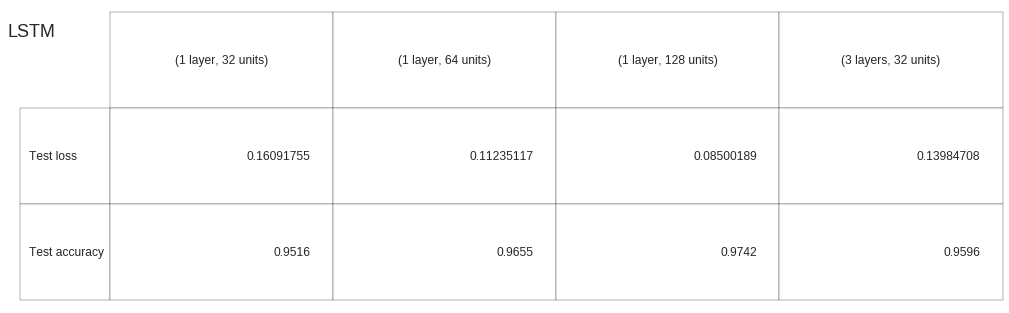

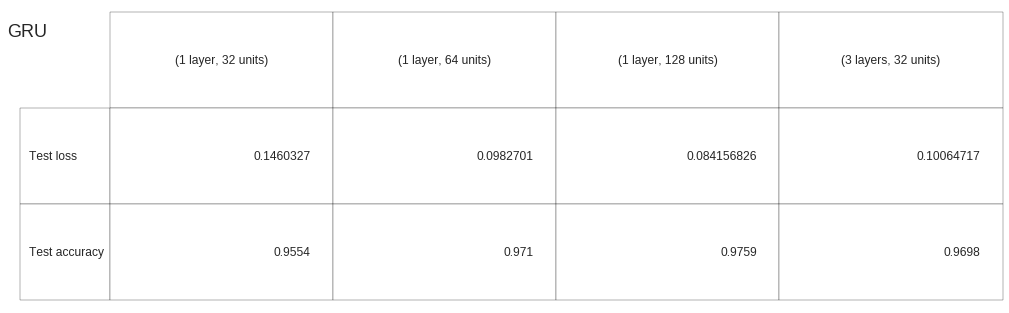

In [6]:
plot_summary_table(experiment_results)

## Code Question 3

In [0]:
setting_gru = [("GRU",32,1)]
l_rate = 0.001
n_epochs = 10
batch_size = 256

## I ran every combination output[:,-5,:], [:,-4,:], etc..

In [52]:
## Models are based in a single code with a list to pass through every setting
for (rnn,n_units,n_layers) in setting_gru:
     # Reset graph, recreate placeholders and dataset.
    #### In this section we set the main model
     tf.reset_default_graph()
     x, y_ = get_placeholders()
     x_image = tf.reshape(x, [-1, 28, 28])
     mnist = get_data()
     eval_mnist = get_data()
     
     # We set the model 
     if rnn == "LSTM":
         rnn_model =  tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(n_units) for i in range(n_layers)])
     else:
         rnn_model =  tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.GRUCell(n_units) for i in range(n_layers)])
         
     outputs, state= tf.nn.dynamic_rnn(rnn_model, x_image, dtype=tf.float32)
     new_x = outputs[:,-5,:]
     h_relu = tf.nn.relu(new_x)
     h1 = tf.layers.dense(inputs = h_relu,units = 64, activation = tf.nn.relu)
     h1_relu = tf.nn.relu(h1)
     h2 = tf.layers.dense(inputs = h1_relu,units = 64, activation = tf.nn.relu)
     out = tf.layers.dense(inputs = h2,units = 10)
     
     # We set the error, trainer step and accuracy
     cross_entropy = tf.reduce_mean(
     tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=out))
 
     train_step = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
  
     correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(out, 1))
     correct_prediction = tf.cast(correct_prediction, tf.float32)
     accuracy = tf.reduce_mean(correct_prediction)
     prediction = tf.argmax(out,1)
     
     #### Training session
     with tf.train.MonitoredSession() as sess:
         while mnist.train.epochs_completed < n_epochs:
             # Update.
             batch_xs, batch_ys = mnist.train.next_batch(batch_size)
             batch_xs_bin = binarize(batch_xs)
             #################
             # Training step #
             #################
             sess.run(train_step,feed_dict={x: batch_xs, y_: batch_ys})
         
         x_test_bin = binarize(mnist.test.images)
         test_loss,test_accuracy,output_GRU_over_time,binarized_image,prediction_matrix =  sess.run([cross_entropy,accuracy,outputs,x_image,prediction],
                                                                                                    feed_dict = {x:x_test_bin,y_:mnist.test.labels}) 
         p = prediction_matrix[0]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [53]:
#prediction_step_1 = prediction_matrix
print(prediction_step_1[3])

#prediction_step_2 = prediction_matrix
print(prediction_step_2[3])

#prediction_step_3 = prediction_matrix
print(prediction_step_3[3])

#prediction_step_4 = prediction_matrix
print(prediction_step_4[3])

prediction_step_5 = prediction_matrix
print(prediction_step_5[3])



0
0
0
0
0


# Analysis of results

In [0]:
output_GRU_over_time_2 = output_GRU_over_time[3,:,:]
binarized_input_image = binarized_image[3,:,:]

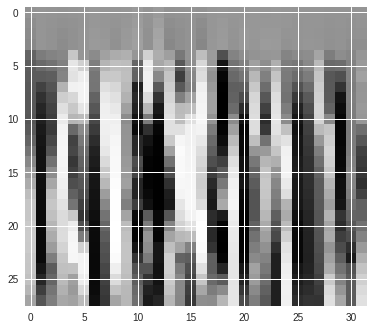

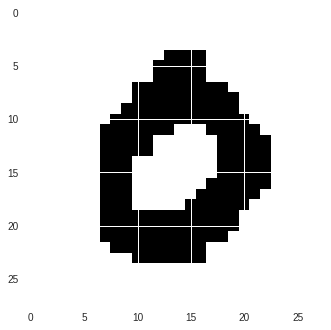

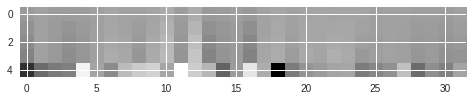

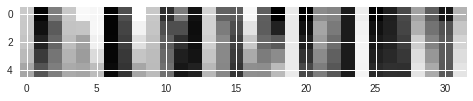

In [39]:
# Look into the GRU computation over time

# plot one sample over time
plt.imshow(output_GRU_over_time_2,cmap = "Greys")
plt.show()
plt.imshow(binarized_input_image,cmap = "Greys")

# Feel free to pick a sample from the dataset that more closely supports your 
# answers in Q3.

# first 5 steps in the computation
plt.show()
plt.imshow(output_GRU_over_time_2[:5,:],cmap = "Greys")

# last 5 steps in the computation
plt.show()
plt.imshow(output_GRU_over_time_2[-5:,:],cmap = "Greys")